# Python機械学習 勉強会 第七回「教師なし学習1」

参考文献：  
Pythonではじめる機械学習　3章  
https://github.com/amueller/introduction_to_ml_with_python/blob/master/03-unsupervised-learning.ipynb

scikit-learnドキュメント：  
https://scikit-learn.org/stable/documentation.html

In [1]:
%matplotlib inline
from preamble import *
from sklearn.model_selection import train_test_split
plt.rcParams['image.cmap'] = "gray"

<br>

---

## はじめに

今回は以下の内容を取り組む

* 教師なし学習と前処理
    * 教師なし学習の種類
    * 教師なし学習の難しさ
    * 前処理とスケール変換
* 次元削減、特徴量抽出、多様体学習
    * 主成分分析(PCA)

<br>

---

## 3 教師なし学習と前処理
### 3.1 教師なし学習の種類

教師なし学習は大きく分けて2種類ある。

1. データセットの変換
1. クラスタリング

<br>

**データセットの変換**は、人間やほかの機械学習アルゴリズムにとって、より分かりやすい表現にすること。  
もっとも一般的な利用法は**次元削減**。

次元削減は、データセットの中から、少量の本質的な特徴量を抽出する方法。  
ざっくり言うなら、重要な特徴量だけ残して、特徴量を減らすことができる。

<br>

**クラスタリング**は、データを似たような要素で構成されるグループに分けるアルゴリズム。

<br>

---

### 3.2 教師なし学習の難しさ

教師なし学習は、ラベルが与えられないデータをもとに学習するので、  
構築したモデルが良いのか判断するのがとても難しい。  
結果を人間が確かめるしかない場合が多い。

そのため、教師なし学習はシステムの一部として利用されるよりは、  
データサイエンティストがデータをより理解するために用いられる場合が多い。

もう1つの一般的な利用法としては、教師あり学習の前処理として使われる。  
データを新しい表現にすることで、教師ありアルゴリズムの精度が上がったり、計算時間が削減できたりする。

<br>

---

### 3.3 前処理とスケール変換

教師なし学習アルゴリズムを学ぶ前に、より簡単なデータ前処理の方法を確認する。

<br>

#### 3.3.1 さまざまな前処理

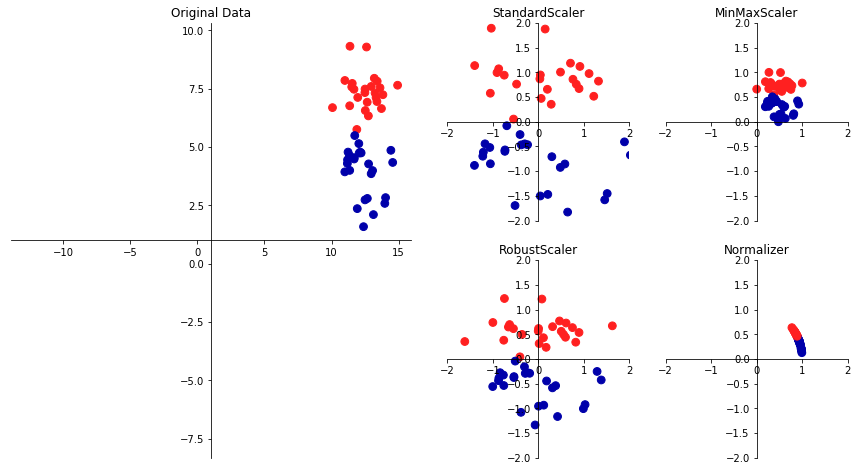

In [2]:
mglearn.plots.plot_scaling()

上の図は、2特徴量の2クラス分類データ(左図)に対して、スケールを変換する4つの方法を右に示している。

* StandardScaler  
個々の特徴量の平均が0、分散が1になるように変換。

* RobustScaler  
個々の特徴量が一定の範囲に入るように変換。  
分散の代わりに中央値と四分位数を用いるため、**外れ値**を無視する。

* MinMaxScaler  
データが0～1の範囲になるように変換。

* Normalizer  
個々のデータポイントを特徴量ベクトルがユークリッド長1になるように変換。  
つまり、データポイントを半径1の円(高次元なら超球面)に投射する。  
特徴ベクトルの長さではなく、方向(or 角度)が問題になる場合に用いられる。

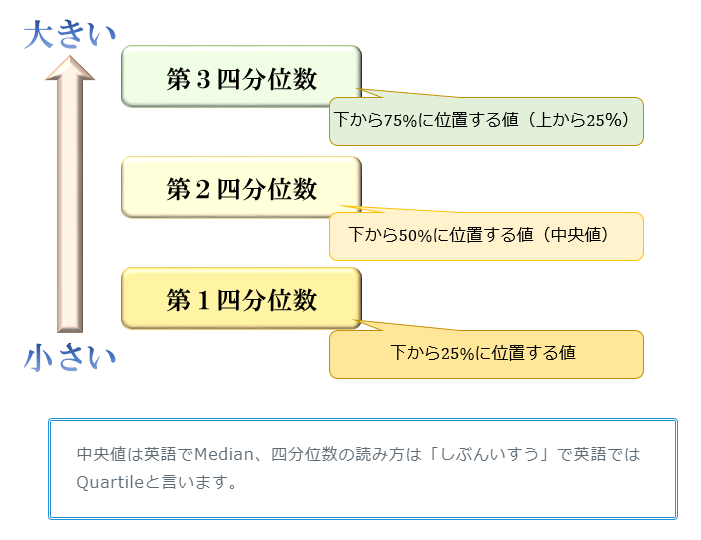

In [3]:
from IPython.display import Image, display_png
display_png(Image('./image/median.png'))

<br>

#### 3.3.2 データ変換の適用

実際に、教師あり学習の前処理としてやってみる。

ここでは、カーネル法を用いたSVMをcancerデータセットに適用し、MinMaxScalerを前処理に用いてみる。

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


<br>

前処理を実装したクラスをインポートし、インスタンスを生成する。  
その後、***fit***メソッドを訓練データに対して適用する。

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

<br>

スケール変換器***transform***メソッドを用いて、スケール変換する。

In [6]:
# データを変換
X_train_scaled = scaler.transform(X_train)

# スケール変換の前後のデータ特性を出力
print("transformed shape: {}\n".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}\n".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)

per-feature minimum before scaling:
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
per-feature maximum before scaling:
 [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


<br>

訓練セットだけでなくテストセットにも適当する。  
その際は、**訓練セットで学習したscalerを用いてスケール変換**する。  

In [7]:
# テストデータを変換
X_test_scaled = scaler.transform(X_test)

# スケール変換の前後のデータ特性を出力
print("per-feature minimum after scaling:\n{}\n".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]

per-feature maximum after scaling:
[0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


<br>

#### 3.3.3 訓練データとテストデータを同じように変換する。

上で示したように、テストセットを訓練セットとまったく同じ変換をすることは重要である。

**なぜか？**  
ここで、テストセットを別途スケールを学習させて、動きを確認してみる。

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

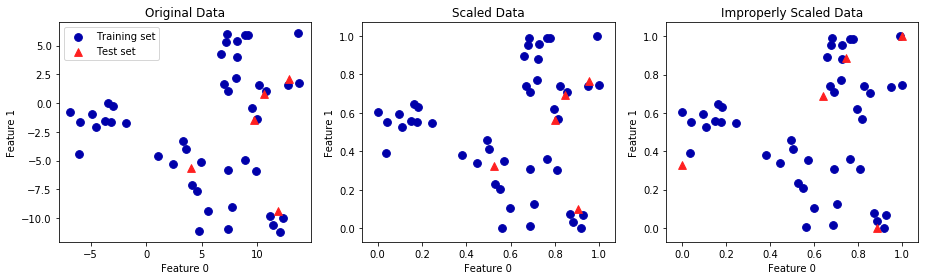

In [8]:
from sklearn.datasets import make_blobs
# データを作成
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# 訓練セットとデータセットに分割
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 訓練セットとテストセットをプロット
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# MinMaxScalerで訓練セットをスケール変換
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# スケール変換されたデータの特性を可視化
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# テストセットを、訓練セットとは別にスケール変換
# ここではわざとやっているが、実際にはやってはいけない！
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 間違ってスケール変換されたデータの特性を可視化
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

左はスケール変換していないデータセットのプロット。  
中央は左のデータを同じスケール変換したもの。  
右は別々にスケール変換したもの。

中央は、オリジナルのデータ分布を保っている(スケールだけ違う)が、  
右は分布が変わってしまっている。これでは正しくモデルを評価できない。

<br>

### TIPS

あるデータセットにたいして、モデルをfitしてからtransformしたい場合、  
それらを効率的に実行する***fit_transform***メソッドが用意されている。

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fitとtransformを続けて呼ぶ
X_scaled = scaler.fit(X_train).transform(X_train)

# 上と同じ結果になるが、効率的
X_scaled_d = scaler.fit_transform(X_train)

<br>

#### 3.3.4 教師あり学習における前処理の効果

話を元に戻して、スケール変換(MinMaxScaler)の効果を確認してみる。  
比較のために、スケール変換あり/なしで評価する。

In [10]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100, gamma='auto')
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


In [11]:
# 0-1スケール変換で前処理
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 変換された訓練データで学習
svm.fit(X_train_scaled, y_train)

# 変換されたテストデータでスコア評価
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


<br>

一目でわかるように、SVMにおいてスケール変換の影響は非常に大きい。  

scikit-learnには様々なスケール変換が実装されているので、  
使用するモデル、データセットの特性にあわせて選択する必要がある。

<br>

---

### 3.4 次元削減、特徴量抽出、多様体学習

前記の通り、教師なし学習の利用法の1つに、可視化、データ圧縮を目的としたデータ変換が挙げられる。

これらの目的に対して最も使われているのが、**主成分分析(principal component analysis:PCA)**だ。

<br>

#### 3.4.1 主成分分析(PCA)

主成分分析とは、データセットの特徴量を相互に統計的に関連しないように回転する手法である。(原文ママ)

何を言っているかわからないと思うので、図を見ながら解説する。

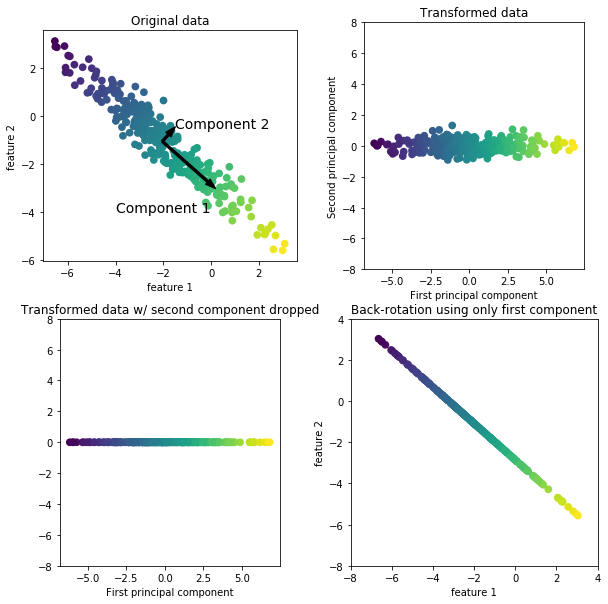

In [12]:
mglearn.plots.plot_pca_illustration()

図の左上はオリジナルのデータセット。軸は特徴量。  

PCAは、まず最も分散が大きい(情報を持っている)方向を見つけ、  
「第1成分」というラベルを付ける。  

つまり、この方向は特徴量が最も相互に関係する方向である。  

<br>

次に、第1成分と直行する方向の中から、次に最も分散が大きい方向を探す。  
2次元だと直行する方向は1つしかあり得ないが、高次元だと複数ある。
* このように見つけた方向を**主成分**と呼ぶ。

<br>

右上の図は、x軸に第1成分、y軸に第2成分となるように回転させたもの。  
2つの軸に相関はない。

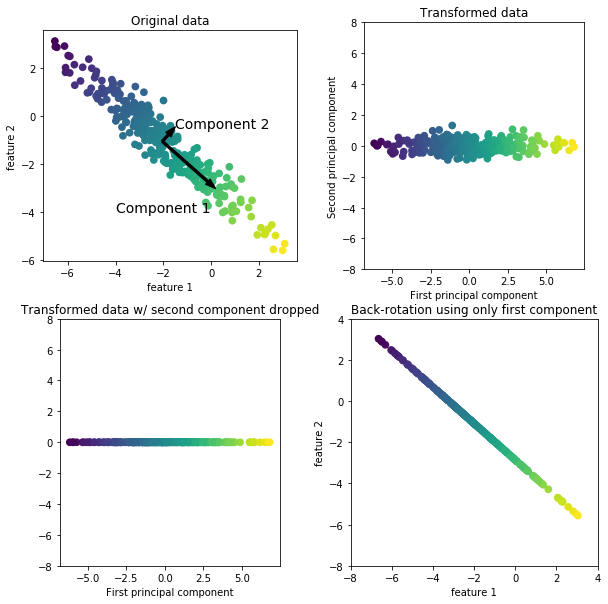

In [13]:
mglearn.plots.plot_pca_illustration()

主成分のうち、いくつかを残すことで、PCAを次元削減に使うことができる。  
この例では、左下の図でそれを図示している。

ここでは第1成分だけを残し、第2成分をドロップした。  
つまり、2次元のデータセットが1次元に削減されたこととなる。

<br>

**注意**  
もとの特徴量のどちらかを残したわけではなく、最も情報のある方向=第1成分を維持しているだけ。  
もとの特徴量と同一ではない

さらに、逆回転して平均を足し、データをもとの特徴量空間に戻したのが右下の図。  
第1成分に含まれている情報しか維持されていない。

このような変換は、データからノイズを取り除いたりする場合に用いられることがある。

<br>

##### 3.4.1.1 cancerデータセットのPCAによる可視化

PCAの一般的な使われ方は、高次元データセットの可視化である。  

cancerデータセットのような高次元のデータは散布図を作ることが難しい。  
そこで、考えられる簡単な可視化手法は、特徴量ごとにクラスのヒストグラムをつくること。

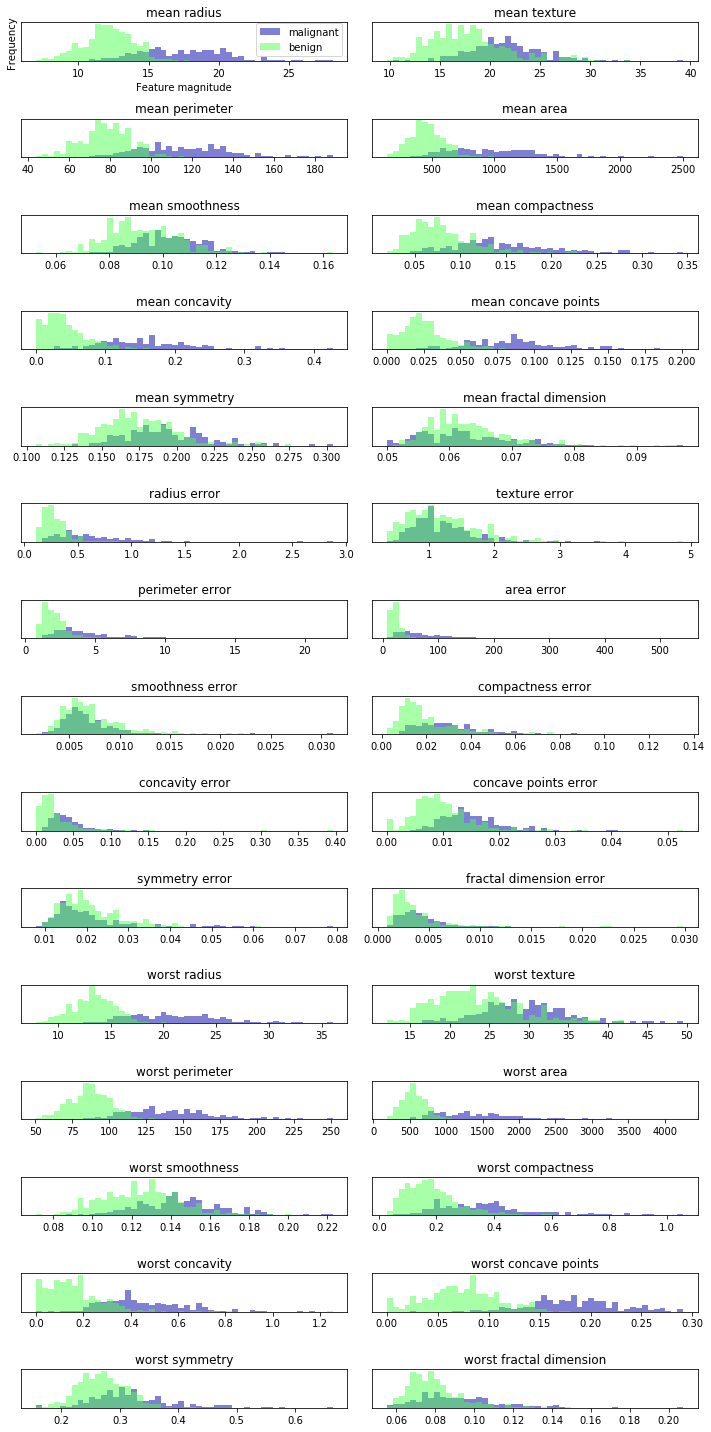

In [14]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

ここでは、各特徴量ごとに、特定のレンジにデータがいくつ入っているか、
クラスごとに数えることで、ヒストグラムを作っている。

こうしてみると、もとの特徴量が2つのクラスを見分けるのに役に立ちそうか、類推することができる。

<br>

しかし、これを見ても、個々の特徴量間の相関や、それがクラス分類に与える影響についてはわからない。  

そこで、PCAを用いて、主な相関をとらえてみる。  
ここでは、PCAを適用して情報が多い2つの主成分を用いて、2次元空間上の散布図として確認してみる。

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

<br>

PCA変換はscalerと同じように実装する。  
オブジェクトを生成し、***fit***して主成分を見つけ、***transform***で回転と次元削減を行う。

In [16]:
from sklearn.decomposition import PCA
# ここでは、情報が多い順に2つの主成分だけ維持する
pca = PCA(n_components=2)

pca.fit(X_scaled)

# 最初の2つの主成分に対して、データポイントを変換
X_pca = pca.transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


<br>

変換後の2つの主成分に対してプロットする。

Text(0, 0.5, 'Second principal component')

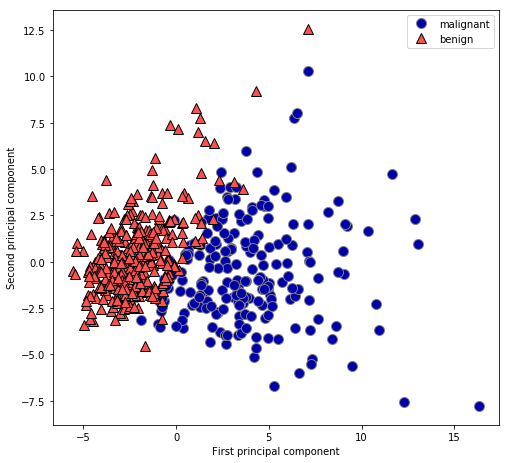

In [17]:
# 第1成分と第2成分によるプロット
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

<br>

2つのクラスがきれいに分離できている。

このデータ表現を使えば、線形モデルでもそれなりに分類できるかもしれない。  

PCAの欠点は、抽出した主成分の解釈が難しいこと。  
各主成分はもとの特徴量の組み合わせにすぎないが、非常に複雑である。

主成分は***components_***属性に格納されている。

In [18]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


<br>

***components_***の各行が、1つの主成分に対応し、列はPCA変換する前のもとの特徴量に対応する。

In [19]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


Text(0, 0.5, 'Principal components')

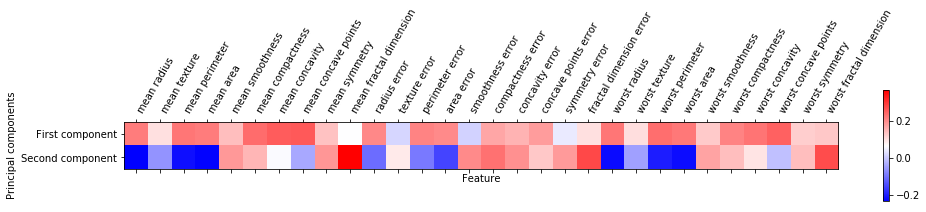

In [20]:
plt.matshow(pca.components_, cmap='bwr')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

各主成分ごとに、30の特徴量すべてが混ざり合っており、その解釈は困難である場合が多い。

<br>

---

## おわり

誤字脱字、不明点あればご連絡ください。